In [1]:
import string
import numpy as np
import pandas as pd

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pickle
df = pickle.load( open( "../data/all_fed_speeches", "rb" ) )
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733 entries, 0 to 734
Data columns (total 5 columns):
date       733 non-null datetime64[ns]
speaker    733 non-null object
title      733 non-null object
link       733 non-null object
text       733 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 34.4+ KB


In [3]:
doc_list = list(df['text'])

In [4]:
tfidvect =TfidfVectorizer(lowercase=True, 
                          stop_words='english',
                          max_features = 1000,
                          norm = 'l2',
                          use_idf = True,
                          smooth_idf=True,
                          sublinear_tf = False)
tfidf_vectorized = tfidvect.fit_transform(doc_list)

In [5]:
# checking stop words (which includes the cleared features from max_features)
stops = tfidvect.stop_words_
print(len(stops))


26767


In [6]:
# checking the vocabulary
vocab = tfidvect.vocabulary_
print(len(vocab))

1000


In [7]:
print(vocab)


{'china': 155, 'global': 391, 'economic': 284, 'important': 439, 'developments': 260, 'recent': 741, 'decades': 238, 'past': 642, 'years': 995, 'economy': 288, 'growth': 408, 'rate': 735, 'nearly': 593, '10': 1, 'percent': 649, 'year': 994, 'resulting': 790, 'output': 631, 'overall': 633, 'size': 856, 'today': 940, 'fourth': 374, 'largest': 505, 'world': 991, 'terms': 925, 'gross': 404, 'domestic': 276, 'product': 699, 'gdp': 387, 'current': 226, 'exchange': 321, 'rates': 736, 'second': 820, 'adjustments': 56, 'differences': 262, 'national': 589, 'strong': 890, 'performance': 651, 'improved': 442, 'standards': 878, 'people': 648, 'estimates': 313, 'million': 573, 'reforms': 753, 'began': 106, '2004': 18, 'life': 523, 'fallen': 342, '000': 0, 'measures': 564, 'remains': 769, 'developing': 258, 'nation': 588, 'particular': 640, 'average': 94, 'household': 430, 'consumption': 198, 'remain': 767, 'quite': 729, 'low': 543, 'areas': 80, 'challenge': 148, 'high': 418, 'stable': 874, 'developm

In [8]:
tfidf_arr = tfidf_vectorized.toarray()
tfidf_arr[0:10,0:10]

array([[0.0120277 , 0.01952326, 0.00467892, 0.00867747, 0.0050535 ,
        0.01041692, 0.01029846, 0.01116975, 0.00570364, 0.00558488],
       [0.        , 0.01840275, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01316085, 0.01344071, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.0350087 , 0.00757678, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.01659447, 0.01325669, 0.01229286, 0.014318  ,
        0.01475704, 0.02188383, 0.03164706, 0.01616001, 0.01582353],
       [0.        , 0.00852611, 0.0204335

1. For 4 groups (classes) of the 20newsgroups corpus (your choice), find the 10 most important words by:
    * total tf-idf score
    * average tf-idf score (average only over non-zero values)
    * highest tf (only) score across corpus (try using `use_idf = False` in `TfidfVectorizer` )


In [9]:
def get_top_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the highest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["cat", "pig"]
    '''
    return [labels[i] for i in np.argsort(lst)[-1:-n-1:-1]]

In [10]:
# finding average tf-idf score in the vocabulary
avg = np.sum(tfidf_arr, axis=0) / np.sum(tfidf_arr > 0, axis=0)
print("top 50 by average tf-idf")
l_avg = list(avg)
v_words = list(vocab.keys())
print(get_top_values(l_avg, 50, v_words))

top 50 by average tf-idf
['saving', 'purchase', 'education', 'expect', 'loan', 'bound', 'governments', 'effective', 'second', 'efforts', 'looking', 'wide', 'short', 'scope', 'fed', 'release', 'reduce', 'rates', 'value', 'exchange', 'direct', 'requirements', 'payments', 'companies', 'essential', 'path', 'subject', 'considerable', 'international', 'certain', 'pressure', 'encourage', 'practices', 'analysis', 'necessarily', 'moderate', 'flows', 'reducing', 'flow', 'institutional', 'current', 'ways', 'actual', 'liquid', 'fixed', 'faster', 'reform', 'simple', 'similar', 'ensure']


In [11]:
# finding total tf-idf scrore
total = np.sum(tfidf_arr, axis=0)
print("top 10 by total tf-idf")
print(get_top_values(total, 50, v_words))


top 10 by total tf-idf
['expect', 'value', 'purchase', 'looking', 'practices', 'subject', 'direct', 'institutional', 'requirements', 'release', 'moderate', 'state', 'education', 'reducing', 'ways', 'counterparties', 'issue', 'fixed', 'corporate', 'simple', 'internal', 'data', 'challenges', 'tool', 'analysis', 'term', 'extended', 'reduced', 'relatively', 'certain', 'common', 'council', 'spending', 'path', 'short', 'deposits', 'develop', 'systemic', 'congress', 'information', 'dodd', '2013', 'making', 'used', 'staff', 'similar', 'following', 'understanding', 'activities', 'balance']


In [12]:
# HIGHEST tfidf across corpus
# redo vectorization without using idf
vectorizer2 = TfidfVectorizer(use_idf=False, max_features=1000)
# make documents into one giant document for this purpose
vectors2 = vectorizer2.fit_transform(["\n".join(doc_list)]).toarray()

vocab2 = vectorizer2.vocabulary_
words = list(vocab2.keys())
print("Here is the length of the new vocab: ", len(vocab2))
print("top 10 by tf across all corpus")
print(get_top_values(vectors2[0], 50, words))


Here is the length of the new vocab:  1000
top 10 by tf across all corpus
['clearing', '25', 'deposits', 'or', 'many', 'mandate', 'effective', 'payments', 'areas', 'provided', 'credit', 'maintain', 'consumption', 'level', 'state', '2012', 'range', 'curve', 'avoid', 'development', 'existing', 'make', 'economists', 'needs', 'contrast', 'macroeconomic', 'reserve', 'hope', 'prudential', 'text', 'promote', 'derivatives', 'recovery', 'so', '000', 'office', 'how', 'me', 'factor', 'primary', 'mid', 'bound', 'face', 'nature', 'back', '2008', 'was', 'our', 'out', 'open']


In [31]:
print(type(vectors2))

<class 'numpy.ndarray'>


In [32]:
print(type(words))

<class 'list'>


In [34]:
whos

Variable            Type                Data/Info
-------------------------------------------------
CountVectorizer     type                <class 'sklearn.feature_e<...>on.text.CountVectorizer'>
PorterStemmer       ABCMeta             <class 'nltk.stem.porter.PorterStemmer'>
RegexpTokenizer     ABCMeta             <class 'nltk.tokenize.regexp.RegexpTokenizer'>
SnowballStemmer     ABCMeta             <class 'nltk.stem.snowball.SnowballStemmer'>
TfidfVectorizer     type                <class 'sklearn.feature_e<...>on.text.TfidfVectorizer'>
WordNetLemmatizer   type                <class 'nltk.stem.wordnet.WordNetLemmatizer'>
avg                 ndarray             1000: 1000 elems, type `float64`, 8000 bytes
df                  DataFrame                     date           <...>n\n[733 rows x 5 columns]
doc_list            list                n=733
get_top_values      function            <function get_top_values at 0x1a13caaae8>
l_avg               list                n=1000
np           

In [13]:
df['date'].iloc[0:5]


0   2006-12-15
1   2006-12-01
2   2006-12-01
3   2006-11-30
4   2006-11-28
Name: date, dtype: datetime64[ns]

In [38]:
import datetime

In [39]:
this_date = datetime.datetime(2006, 12, 15)

In [40]:
print(this_date)

2006-12-15 00:00:00


In [82]:
def create_speech_list(df, date):
    df2 = df[df['date']<= date]
    return df2

In [83]:
df2 = create_speech_list(df, this_date)

In [84]:
df2.tail()

,date,speaker,title,link,text
421,2012-01-16,Governor Elizabeth A. Duke,From Community Banker to Central Banker--My Jo...,/newsevents/speech/duke20120116a.htm,\n It is certainly a pleasure to be here...
422,2012-01-13,Governor Elizabeth A. Duke,Opportunities to Reduce Regulatory Burden and ...,/newsevents/speech/duke20120113a.htm,\n It's a pleasure to be here this morni...
423,2012-01-07,Governor Sarah Bloom Raskin,Creating and Implementing an Enforcement Respo...,/newsevents/speech/raskin20120107a.htm,\n Thank you and happy New Year. It is a...
424,2012-01-06,Governor Sarah Bloom Raskin,Community Bank Examination and Supervision ami...,/newsevents/speech/raskin20120106a.htm,\n Thank you for the opportunity to spea...
425,2012-01-06,Governor Elizabeth A. Duke,"Economic Developments, Risks to the Outlook, a...",/newsevents/speech/duke20120106a.htm,"It is the start of a new year, the traditional..."


In [46]:
len(df2)

73

In [48]:
df2.iloc[0:3]

,date,speaker,title,link,text
0,2006-12-15,Chairman Ben S. Bernanke,The Chinese Economy: Progress and Challenges,/newsevents/speech/bernanke20061215a.htm,The emergence of China as a global economic po...
1,2006-12-01,Vice Chairman Donald L. Kohn,Monetary Policy and Uncertainty,/newsevents/speech/kohn20061201a.htm,Tonight I will talk about one of the themes of...
2,2006-12-01,Chairman Ben S. Bernanke,Welcoming remarks,/newsevents/speech/bernanke20061201a.htm,"Vice President Papademos, ladies and gentlemen..."


In [25]:
def create_speech_list(df, this_date, numb_speeches):
    '''
    For a given date, the most recent speeches are returned in a dataframe

    INPUTS:
        df - the dataframe of all fed speeches
        date - the date needed to include no speeches before
        num_speeches - the number of most recent speeches to include
    OUTPUT:
        dataframe - this is a subset of the original dataframe with same columns
    '''
    filtered_df = df[df['date']<= this_date].copy()
    if len(filtered_df)> numb_speeches:
        filtered_df = filtered_df.iloc[0:numb_speeches]
    return filtered_df


In [26]:
import datetime
this_date = datetime.datetime(2018, 9, 21)

In [30]:
df_test = create_speech_list(df, this_date, 10)
df_test.tail()

,date,speaker,title,link,text
42,2018-06-20,Chairman Jerome H. Powell,Monetary Policy at a Time of Uncertainty and T...,/newsevents/speech/powell20180620a.htm,Nine years into an expansion that has sometime...
43,2018-05-31,Governor Lael Brainard,Sustaining Full Employment and Inflation aroun...,/newsevents/speech/brainard20180531a.htm,I appreciate the opportunity to join the Forec...
44,2018-05-25,Chairman Jerome H. Powell,Financial Stability and Central Bank Transparency,/newsevents/speech/powell20180525a.htm,Thank you for inviting me here to celebrate th...
45,2018-05-18,Governor Lael Brainard,Keeping Community at the Heart of the Communit...,/newsevents/speech/brainard20180518a.htm,I want to thank Ben Dulchin and the Associatio...
46,2018-05-16,Vice Chairman for Supervision Randal K. Quarles,Trust Everyone--But Brand Your Cattle: Finding...,/newsevents/speech/quarles20180516a.htm,Thank you to Professor Scott for inviting me t...


In [31]:
df_new = df.iloc[41]

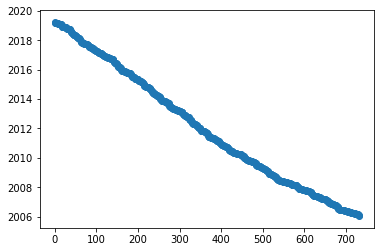

In [16]:
## are my dates in line?
temp = df['date']
x = np.arange(len(temp))
plt.scatter(x, temp)

In [15]:
# sorting the dataframe and resetting the index
df.sort_values(by=['date'], ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)

In [32]:
df_test = create_speech_list(df, this_date, 10)
df_test.tail()

,date,speaker,title,link,text
42,2018-06-20,Chairman Jerome H. Powell,Monetary Policy at a Time of Uncertainty and T...,/newsevents/speech/powell20180620a.htm,Nine years into an expansion that has sometime...
43,2018-05-31,Governor Lael Brainard,Sustaining Full Employment and Inflation aroun...,/newsevents/speech/brainard20180531a.htm,I appreciate the opportunity to join the Forec...
44,2018-05-25,Chairman Jerome H. Powell,Financial Stability and Central Bank Transparency,/newsevents/speech/powell20180525a.htm,Thank you for inviting me here to celebrate th...
45,2018-05-18,Governor Lael Brainard,Keeping Community at the Heart of the Communit...,/newsevents/speech/brainard20180518a.htm,I want to thank Ben Dulchin and the Associatio...
46,2018-05-16,Vice Chairman for Supervision Randal K. Quarles,Trust Everyone--But Brand Your Cattle: Finding...,/newsevents/speech/quarles20180516a.htm,Thank you to Professor Scott for inviting me t...


In [33]:
df_new = df.iloc[41]

In [34]:
test_docs = list(df_test['text'])
print(len(test_docs))
print(type(test_docs))

10
<class 'list'>


In [39]:
one_text = df_new['text']
print(type(one_text))

<class 'str'>


In [42]:
tfidvect =TfidfVectorizer(lowercase=True, 
                          stop_words='english',
                          max_features = 2000,
                          norm = 'l2',
                          use_idf = True,
                          smooth_idf=True,
                          sublinear_tf = False)
tfidf_vectorized = tfidvect.fit_transform(test_docs).toarray()

In [43]:
# checking stop words (which includes the cleared features from max_features)
stops = tfidvect.stop_words_
print(len(stops))

1764


In [44]:
# checking the vocabulary
vocab = tfidvect.vocabulary_
print(len(vocab))

2000


In [49]:
#print(vocab)

In [50]:
tfidf_vectorized[0:10,0:10]

array([[0.00901629, 0.01030572, 0.        , 0.04555605, 0.00719893,
        0.01030572, 0.01439787, 0.        , 0.00801612, 0.01030572],
       [0.        , 0.01693255, 0.        , 0.01603922, 0.        ,
        0.        , 0.        , 0.00846627, 0.00658534, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01208467, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.09970112,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.05350918, 0.        , 0.        , 0.00965581, 0.02136184,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.0488154 , 0.01310274, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.01053755, 0.        , 0.        , 0.09127281, 0.00841357,
        0.        , 0.03365428, 0.01204455, 0.00936864, 0.01204455],
       [0.        , 0.        , 0.       

In [54]:
          # finding average tf-idf score in the vocabulary
avg = np.sum(tfidf_vectorized, axis=0) / np.sum(tfidf_vectorized > 0, axis=0)
print("top 50 by average tf-idf")
l_avg = list(avg)
v_words = list(vocab.keys())
print(get_top_values(l_avg, 50, v_words))  

top 50 by average tf-idf
['economies', 'better', 'threats', 'fallen', 'supporting', 'stars', 'tend', 'little', 'legislation', 'subsidiary', 'forum', 'text6', 'hogue', 'stringency', 'assisted', 'reporting', 'held', 'look', 'söderström', '30', 'prices', 'flexibility', 'remaining', 'questions', 'position', 'global', 'economy', 'ability', 'roundtable', 'age', 'evaluated', 'symposium', 'important', 'hole', 'exceed', 'data', 'frederic', 'maintain', 'fund', 'president', 'complex', 'originally', '20', 'impose', '28', '1967', 'boost', 'factor', 'additionally', 'remarks']


In [55]:
# finding total tf-idf scrore
total = np.sum(tfidf_vectorized, axis=0)
print("top 10 by total tf-idf")
print(get_top_values(total, 50, v_words))


top 10 by total tf-idf
['stringency', 'tend', 'symposium', '39', 'remained', 'clearly', 'evaluated', 'economies', 'impose', '1967', 'hole', 'contracts', 'better', 'flexibility', 'priority', 'proxy', 'markets', 'resiliency', 'little', 'valley', 'position', 'reporting', 'strength', 'broad', 'subsidiary', 'söderström', 'exceed', 'frederic', 'systemic', 'fund', 'text6', 'calif', 'shift', 'doing', 'revealed', 'mechanisms', 'fallen', 'threats', 'ihc', 'recovered', 'provides', '28', 'remarks', 'delivered', 'absorb', 'success', 'ability', 'discuss', 'increases', 'creation']


In [56]:
# HIGHEST tfidf across corpus
# redo vectorization without using idf
vectorizer2 = TfidfVectorizer(use_idf=False, max_features=2000)
# make documents into one giant document for this purpose
vectors2 = vectorizer2.fit_transform(["\n".join(test_docs)]).toarray()

vocab2 = vectorizer2.vocabulary_
words = list(vocab2.keys())
print("Here is the length of the new vocab: ", len(vocab2))
print("top 10 by tf across all corpus")
print(get_top_values(vectors2[0], 50, words))


Here is the length of the new vocab:  2000
top 10 by tf across all corpus
['euro', 'costs', 'generate', 'innovations', 'text7', 'boost', 'good', 'kiley', 'between', 'emphasize', 'regulatory', 'keep', 'separate', 'deserts', 'directly', 'spillovers', 'chen', 'richmond', 'standard', 'means', 'played', 'normal', 'product', 'remained', 'thomas', 'slack', 'forecasts', 'prepositioning', 'approaches', 'through', 'systemic', '2001', 'position', 'size', 'paper', 'monitoring', 'considering', 'presence', '1965', 'commentary', 'country', 'oil', 'instrument', 'lei', '1998', 'make', 'salt', 'applying', 'securities', 'either']


In [59]:
new_tokens = tfidvect.transform([one_text]) #note needed the [] for one document

In [65]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sims = linear_kernel(new_tokens, tfidf_vectorized)


In [73]:
cosine_sims
avg_cos =np.mean(cosine_sims)
last_cos = cosine_sims[0][0]
print('The last speech has an average cosine sim of the last 10 speeches of: ', avg_cos)
print('The last speech had a cosine sim relative to prior speech of: ', last_cos)

The last speech has an average cosine sim of the last 10 speeches of:  0.284802968553296
The last speech had a cosine sim relative to prior speech of:  0.1421336102082461


In [72]:
cosine_sims[0][0]

0.1421336102082461

In [78]:
all_dates = df['date'].unique()


In [79]:
len(all_dates)

642

In [81]:
vc_dates =df['date'].value_counts()

In [82]:
vc_dates

2010-04-08    4
2006-05-16    3
2017-03-03    3
2018-12-03    3
2006-06-12    3
2016-02-26    2
2008-05-29    2
2006-06-16    2
2010-09-24    2
2006-10-04    2
2008-12-08    2
2016-03-07    2
2013-04-04    2
2019-02-22    2
2006-12-01    2
2013-02-22    2
2007-10-05    2
2017-07-06    2
2015-04-02    2
2013-03-04    2
2007-03-05    2
2010-11-12    2
2015-12-02    2
2008-03-07    2
2013-10-18    2
2018-02-26    2
2013-06-02    2
2009-10-23    2
2008-03-04    2
2008-12-04    2
             ..
2019-03-12    1
2018-01-19    1
2007-01-11    1
2008-12-01    1
2007-10-11    1
2011-05-16    1
2006-09-01    1
2008-04-14    1
2017-10-04    1
2007-04-25    1
2016-10-14    1
2016-05-26    1
2011-06-07    1
2008-02-15    1
2010-10-25    1
2015-11-05    1
2008-06-26    1
2018-04-19    1
2018-06-20    1
2008-03-11    1
2013-02-05    1
2007-05-23    1
2013-10-11    1
2019-02-23    1
2016-11-11    1
2018-03-05    1
2007-09-24    1
2011-04-29    1
2014-12-02    1
2007-05-01    1
Name: date, Length: 642,

Welcoming Remarks                                                                            16
Opening Remarks                                                                              13
Brief Remarks                                                                                10
The Economic Outlook                                                                          9
The Economic Outlook and Monetary Policy                                                      4
Remarks                                                                                       4
The U.S. Economic Outlook                                                                     3
Outlook and Risks for the U.S. Economy                                                        3
Introductory Remarks                                                                          3
The Federal Reserve and the Global Economy                                                    2
The Fire-Sales Problem and Securities Fi

In [113]:
unique_dates = df['date'].unique()

In [114]:
len(unique_dates)

642

In [119]:
b = np.sort(unique_dates)

In [126]:
n_speeches = 5
first_date = df['date'].iloc[-n_speeches]
first_date

Timestamp('2006-02-24 00:00:00')

In [127]:
df.tail()

,date,speaker,title,link,text
728,2006-02-24,"Vice Chairman Roger W. Ferguson, Jr.",The Importance of Education,/newsevents/speech/ferguson20060224a.htm,I am pleased to have the opportunity to be par...
729,2006-02-23,"Vice Chairman Roger W. Ferguson, Jr.","Globalization, Insurers, and Regulators: Share...",/newsevents/speech/ferguson20060223a.htm,I am honored to deliver the keynote address at...
730,2006-02-06,Chairman Ben S. Bernanke,Remarks at ceremonial swearing-in by President...,/newsevents/speech/bernanke20060206a.htm,Good morning.I would like to begin by thanking...
731,2006-02-02,Governor Susan Schmidt Bies,The Continuous Challenges of Risk Management,/newsevents/speech/bies20060202a.htm,I thank you for the invitation to speak today....
732,2006-01-18,Governor Susan Schmidt Bies,Productivity and Economic Outlook,/newsevents/speech/bies20060118a.htm,I appreciate the opportunity to speak with you...


In [128]:
print(type(unique_dates))

<class 'numpy.ndarray'>


In [136]:
first_date = df['date'].iloc[-n_speeches]
print(first_date)
print(type(first_date))

2006-02-24 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [133]:
unique_dates

array(['2006-01-18T00:00:00.000000000', '2006-02-02T00:00:00.000000000',
       '2006-02-06T00:00:00.000000000', '2006-02-23T00:00:00.000000000',
       '2006-02-24T00:00:00.000000000', '2006-03-03T00:00:00.000000000',
       '2006-03-08T00:00:00.000000000', '2006-03-10T00:00:00.000000000',
       '2006-03-13T00:00:00.000000000', '2006-03-16T00:00:00.000000000',
       '2006-03-20T00:00:00.000000000', '2006-03-29T00:00:00.000000000',
       '2006-03-31T00:00:00.000000000', '2006-04-03T00:00:00.000000000',
       '2006-04-05T00:00:00.000000000', '2006-04-06T00:00:00.000000000',
       '2006-04-10T00:00:00.000000000', '2006-04-13T00:00:00.000000000',
       '2006-04-17T00:00:00.000000000', '2006-04-20T00:00:00.000000000',
       '2006-04-27T00:00:00.000000000', '2006-04-28T00:00:00.000000000',
       '2006-05-03T00:00:00.000000000', '2006-05-04T00:00:00.000000000',
       '2006-05-11T00:00:00.000000000', '2006-05-16T00:00:00.000000000',
       '2006-05-18T00:00:00.000000000', '2006-05-24

In [135]:
unique_dates = unique_dates >= first_date
unique_dates

TypeError: Cannot compare type 'Timestamp' with type 'int'

In [137]:
print(type(first_date))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [138]:
print(type(unique_dates))

<class 'numpy.ndarray'>


In [139]:
a = unique_dates[0]
print(type(a))

<class 'numpy.datetime64'>


In [140]:
df.sample(4)

,date,speaker,title,link,text
393,2011-02-18,Chairman Ben S. Bernanke,Global Imbalances: Links to Economic and Finan...,/newsevents/speech/bernanke20110218a.htm,\n By facilitating the allocation of the...
242,2014-05-01,Chair Janet L. Yellen,Tailored Supervision of Community Banks,/newsevents/speech/yellen20140501a.htm,\n Thank you for inviting me to ICBA's p...
283,2013-05-18,Chairman Ben S. Bernanke,Economic Prospects for the Long Run,/newsevents/speech/bernanke20130518a.htm,\n Let me start by congratulating the gr...
501,2009-04-14,Chairman Ben S. Bernanke,Four Questions about the Financial Crisis,/newsevents/speech/bernanke20090414a.htm,I am pleased to have the privilege of speaking...


In [213]:
df['date']= pd.to_datetime(df['date'], for)

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 5 columns):
date       733 non-null datetime64[ns]
speaker    733 non-null object
title      733 non-null object
link       733 non-null object
text       733 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 28.7+ KB


In [208]:
unique_dates = df['date'].unique()
unique_dates = np.sort(unique_dates)

In [222]:
first_

2006-03-20T00:00:00.000000000


In [223]:
first_date = df['date'].iloc[-n_speeches]
print(first_date)
print(type(first_date))
first_date = pd.to_datetime(first_date)
print(type(first_date))
unique_date = unique_dates >= first_date


2006-02-24 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


TypeError: Cannot compare type 'Timestamp' with type 'int'

In [235]:
df[df['date']<=df['date'].iloc[-20:-30:-1]]

ValueError: Can only compare identically-labeled Series objects

In [195]:
print(type(unique_dates))

<class 'numpy.ndarray'>


In [146]:
b = unique_dates[0]
print(type(b))

<class 'numpy.datetime64'>


In [147]:
b

numpy.datetime64('2006-01-18T00:00:00.000000000')

In [155]:
from datetime import datetime
ud = np.datetime_as_string(unique_dates, 'D')

In [157]:
print(type(ud))

<class 'numpy.ndarray'>


In [158]:
print(type(ud[0]))

<class 'numpy.str_'>


In [161]:
first_date = df['date'].iloc[-n_speeches]
crap = ud >= first_date


TypeError: Cannot compare type 'Timestamp' with type 'str'

In [162]:
print(type(first_date))
print(type(ud))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'numpy.ndarray'>


In [165]:
fd = first_date.4()

In [166]:
print(type(fd))

<class 'numpy.datetime64'>


In [190]:
unique_dates = df['date'].unique()
print(type(unique_dates[0]))
unique_dates = np.sort(unique_dates)
print(type(unique_dates[0]))

<class 'numpy.datetime64'>
<class 'numpy.datetime64'>


In [183]:
print(type(unique_dates[0]))

<class 'numpy.datetime64'>


In [187]:
first_date = df['date'].iloc[-n_speeches]

In [188]:
print(type(first_date))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [175]:
first_date

Timestamp('2006-02-24 00:00:00')

In [176]:
unique_dates[0]

numpy.datetime64('2006-01-18T00:00:00.000000000')

In [177]:
first_date.to_datetime()
first_date

AttributeError: 'Timestamp' object has no attribute 'to_datetime'

In [178]:
df.dtypes

date       datetime64[ns]
speaker            object
title              object
link               object
text               object
dtype: object

In [181]:
print(type(unique_dates[0]))

<class 'numpy.datetime64'>


In [236]:
df.head()

,date,speaker,title,link,text
0,2019-03-25,Governor Michelle W. Bowman,Welcoming Remarks,/newsevents/speech/bowman20190325a.htm,Good afternoon. It is a great pleasure for me ...
1,2019-03-12,Governor Lael Brainard,The Community Reinvestment Act: How Can We Pre...,/newsevents/speech/brainard20190312a.htm,It is a pleasure to have an opportunity to dis...
2,2019-03-11,Chair Jerome H. Powell,Brief Remarks,/newsevents/speech/powell20190311a.htm,"Good evening, and thank you for inviting me to..."
3,2019-03-08,Chair Jerome H. Powell,Monetary Policy: Normalization and the Road Ahead,/newsevents/speech/powell20190308a.htm,Thank you for the opportunity to speak here to...
4,2019-03-07,Governor Lael Brainard,Navigating Cautiously,/newsevents/speech/brainard20190307a.htm,While our economy continues to add jobs at a s...


In [238]:
whos

Variable             Type                Data/Info
--------------------------------------------------
CountVectorizer      type                <class 'sklearn.feature_e<...>on.text.CountVectorizer'>
PorterStemmer        ABCMeta             <class 'nltk.stem.porter.PorterStemmer'>
RegexpTokenizer      ABCMeta             <class 'nltk.tokenize.regexp.RegexpTokenizer'>
SnowballStemmer      ABCMeta             <class 'nltk.stem.snowball.SnowballStemmer'>
TfidfVectorizer      type                <class 'sklearn.feature_e<...>on.text.TfidfVectorizer'>
WordNetLemmatizer    type                <class 'nltk.stem.wordnet.WordNetLemmatizer'>
a                    Timestamp           2019-03-25 00:00:00
aa                   ndarray             1x2000: 2000 elems, type `float64`, 16000 bytes
all_dates            ndarray             642: 642 elems, type `datetime64[ns]`, 5136 bytes
avg                  ndarray             2000: 2000 elems, type `float64`, 16000 bytes
avg_cos              float64     

In [239]:
cos_last = np.zeros_like(df['date'])

In [241]:
cos_avg_n = np.zeros_like(df['date'])

In [242]:
cos_last.shape

(733,)